### Jupiter Notebook For Graph Plots.

Nepochatov Alexey. HSE. MDS.

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython import display

Function that reads distances between actors from .CSV file:

In [5]:
def read_movie_distances(actor_pairs_dict, actors, file_name):

    with open(file_name, newline='') as File:
        actor_pairs_dict = {}
        reader = csv.reader(File)
        first_line_index = True
        for row in reader:
            if first_line_index:
                first_line_index = False
                continue
            
            if row[0].split("\t")[4] == 'infinity':
                actor_pairs_dict[(row[0].split("\t")[0], row[0].split("\t")[2])] = -999999
            else:
                actor_pairs_dict[(row[0].split("\t")[0], row[0].split("\t")[2])] = int(row[0].split("\t")[4])

        return actor_pairs_dict

#### Code for plotting a network.
Function that displays a graph based on distances:

In [6]:
def draw_graph(adj_dict, actors, file_name, option='Full'):
    g = nx.Graph()

    for (actor_1, actor_2), distance in adj_dict.items():
        if distance > 0 and option == 'Full':
            if distance == 1:
                g.add_edge(actor_1, actor_2, weight=distance, color='yellow')
            elif distance == 2:
                g.add_edge(actor_1, actor_2, weight=distance, color='Tomato')
            elif distance == 3:
                g.add_edge(actor_1, actor_2, weight=distance, color='green')
            else:
                g.add_edge(actor_1, actor_2, weight=distance, color='black')

        elif distance > 0 and option == 'Ones':
            if distance == 1:
                g.add_edge(actor_1, actor_2, weight=distance, color='yellow')
        
        elif distance > 0 and option == 'Twos':
            if distance == 2:
                g.add_edge(actor_1, actor_2, weight=distance, color='Tomato')
        
        elif distance > 0 and option == 'Threes':
            if distance == 3:
                g.add_edge(actor_1, actor_2, weight=distance, color='green')

    pos = nx.shell_layout(g, scale=0.6)
    plt.figure(figsize=(20, 20))
    
    # Every edge has a label (movie distance number, if it is less the infinity)
    edges = g.edges()
    edge_labels = nx.get_edge_attributes(g, 'weight')
    colors = [g[u][v]['color'] for u, v in edges]

    nx.draw(g, pos, with_labels=True,
            font_size=15,
            alpha=0.85,
            width=5,
            edge_color=colors,
            node_color='c',
            node_size=19000)
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, font_color='black', font_size=20)
    plt.savefig(file_name)
    plt.close()
    print(f'Graph was exported to {file_name}.')

    return True

Code for displaying graphs:

In [7]:
actors = [['Dwayne Johnson',     'https://www.imdb.com/name/nm0425005/'],
          ['Chris Hemsworth',    'https://imdb.com/name/nm1165110/'],
          ['Robert Downey Jr.',  'https://imdb.com/name/nm0000375/'],
          ['Akshay Kumar',       'https://www.imdb.com/name/nm0474774'],
          ['Jackie Chan',        'https://imdb.com/name/nm0000329'],
          ['Bradley Cooper',     'https://www.imdb.com/name/nm0177896/'],
          ['Adam Sandler',       'https://www.imdb.com/name/nm0001191/'],
          ['Scarlett Johansson', 'https://imdb.com/name/nm0424060/'],
          ['Sofia Vergara',      'https://www.imdb.com/name/nm0005527/'],
          ['Chris Evans',        'https://www.imdb.com/name/nm0262635/']]

actor_pairs_dict = {}
actor_pairs_dict = read_movie_distances(actor_pairs_dict, actors, file_name='result.cvs')

draw_graph(actor_pairs_dict, actors, file_name='full_graph.png')

Graph was exported to full_graph.png.


True

In [8]:
draw_graph(actor_pairs_dict, actors, file_name='ones_graph.png', option='Ones')

Graph was exported to ones_graph.png.


True

In [9]:
draw_graph(actor_pairs_dict, actors, file_name='twos_graph.png', option='Twos')

Graph was exported to twos_graph.png.


True

In [10]:
draw_graph(actor_pairs_dict, actors, file_name='threes_graph.png', option='Threes')

Graph was exported to threes_graph.png.


True

#### Pictures of graph of all pairwise movie distances. Plot of the graph with all edges:

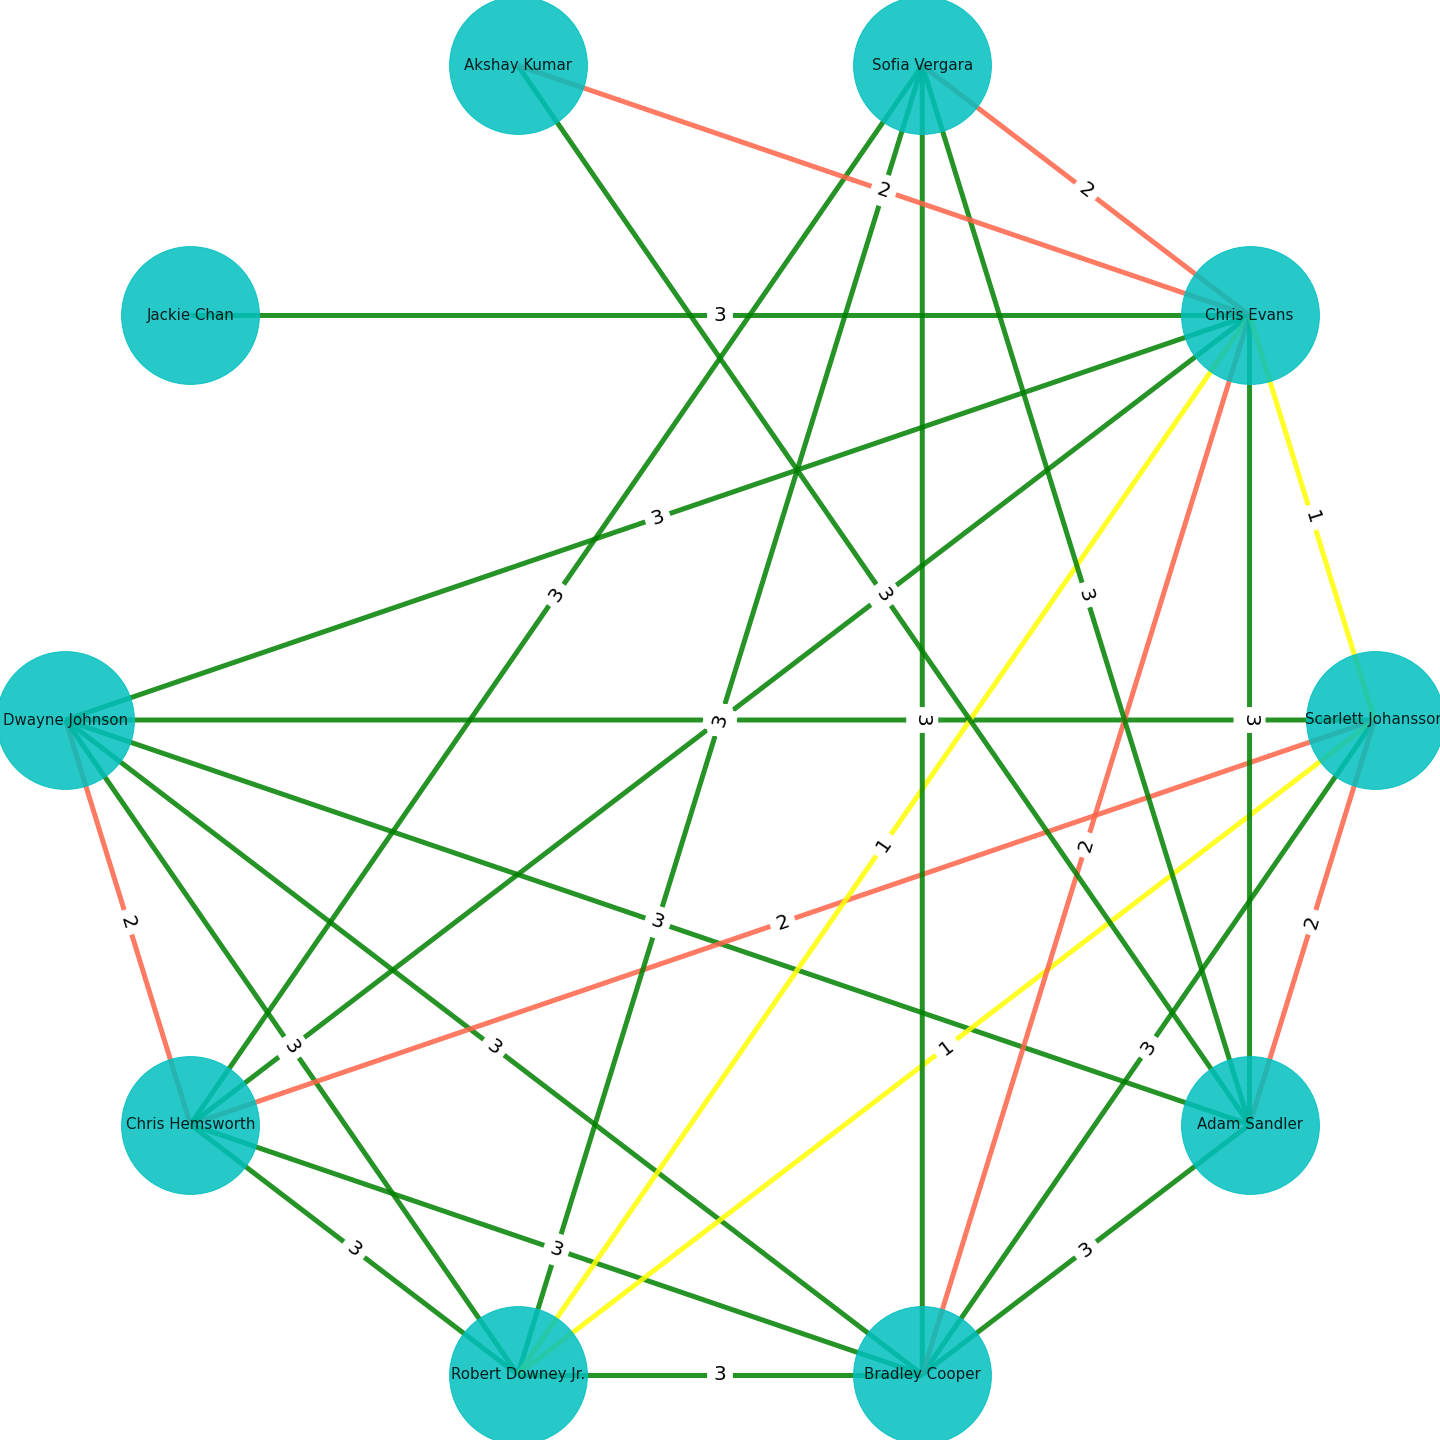

In [11]:
display.Image("./full_graph.png", width=500)

#### Different pictures of graphs for different movie distances.
#### Plot of the graph with edges with weight = 1:

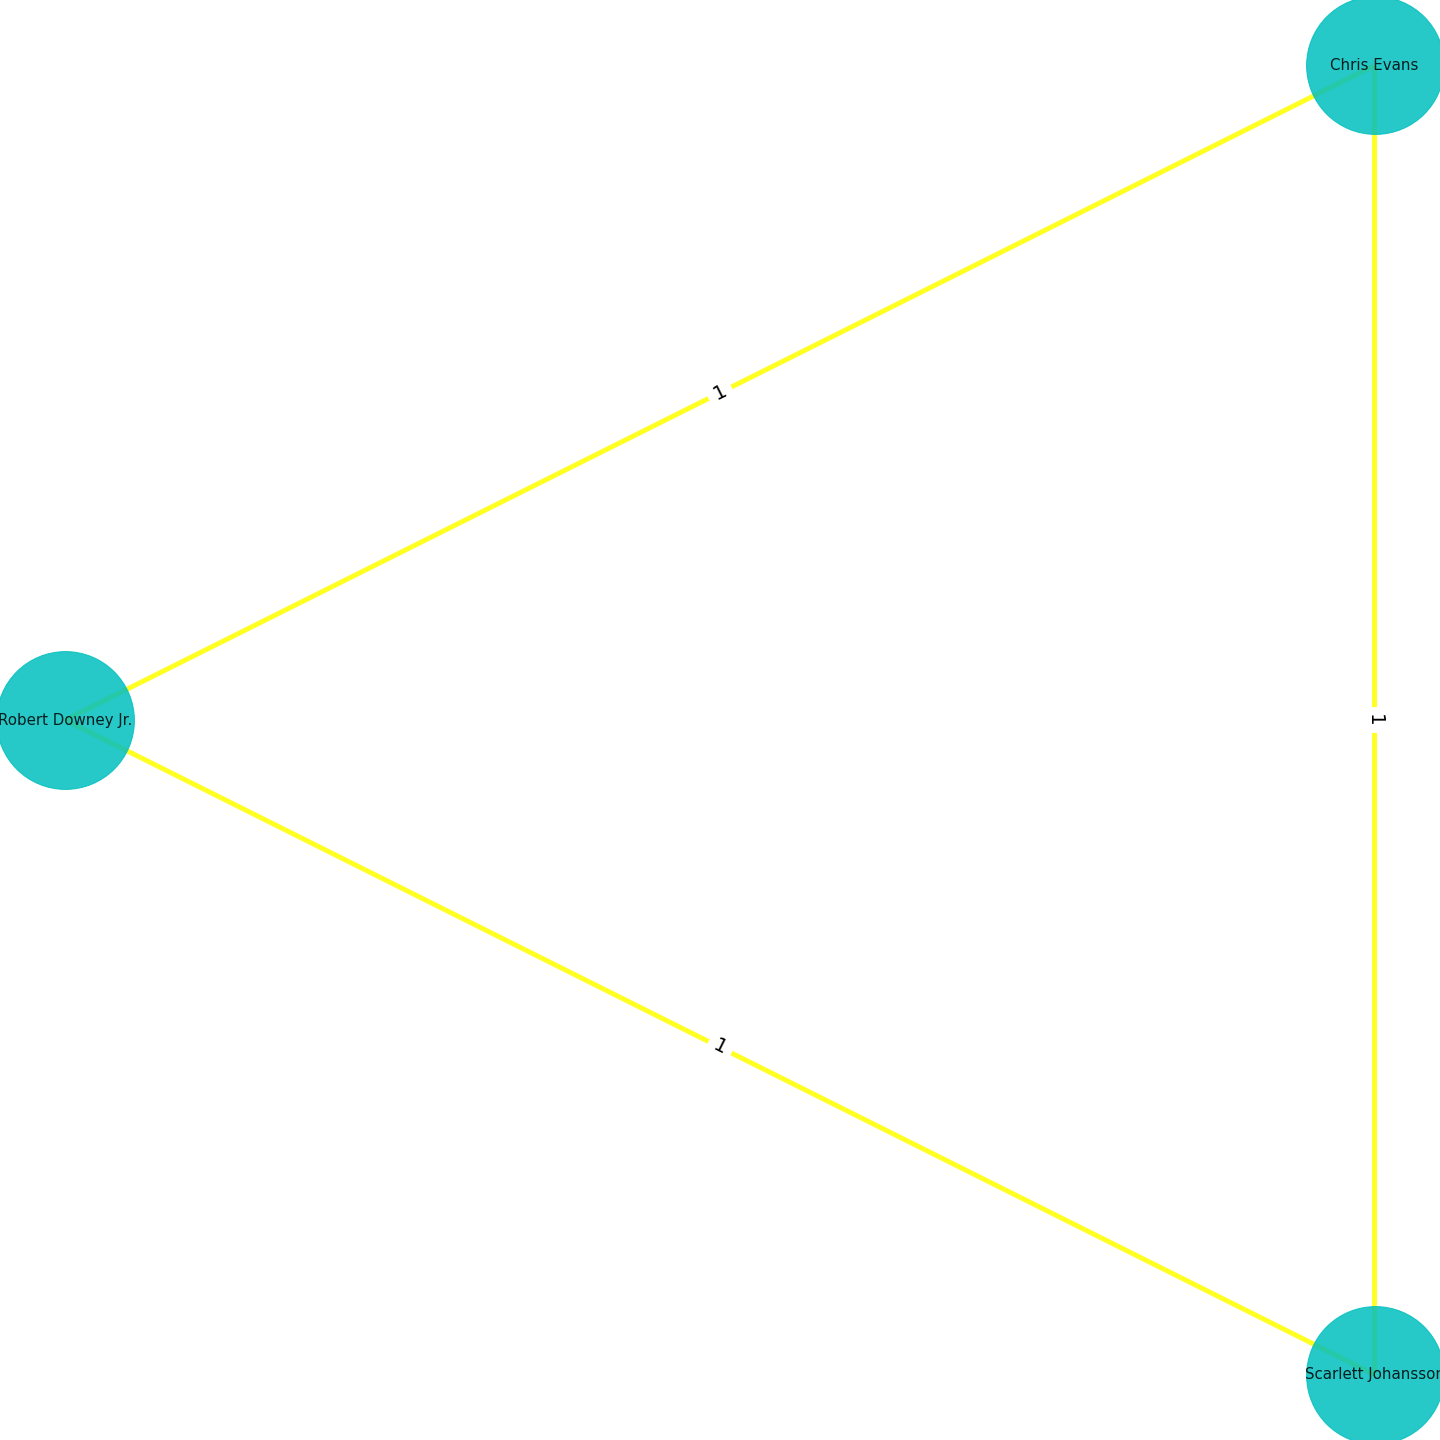

In [12]:
display.Image("./ones_graph.png", width=500)

#### Plot of the graph with edges with weight = 2:

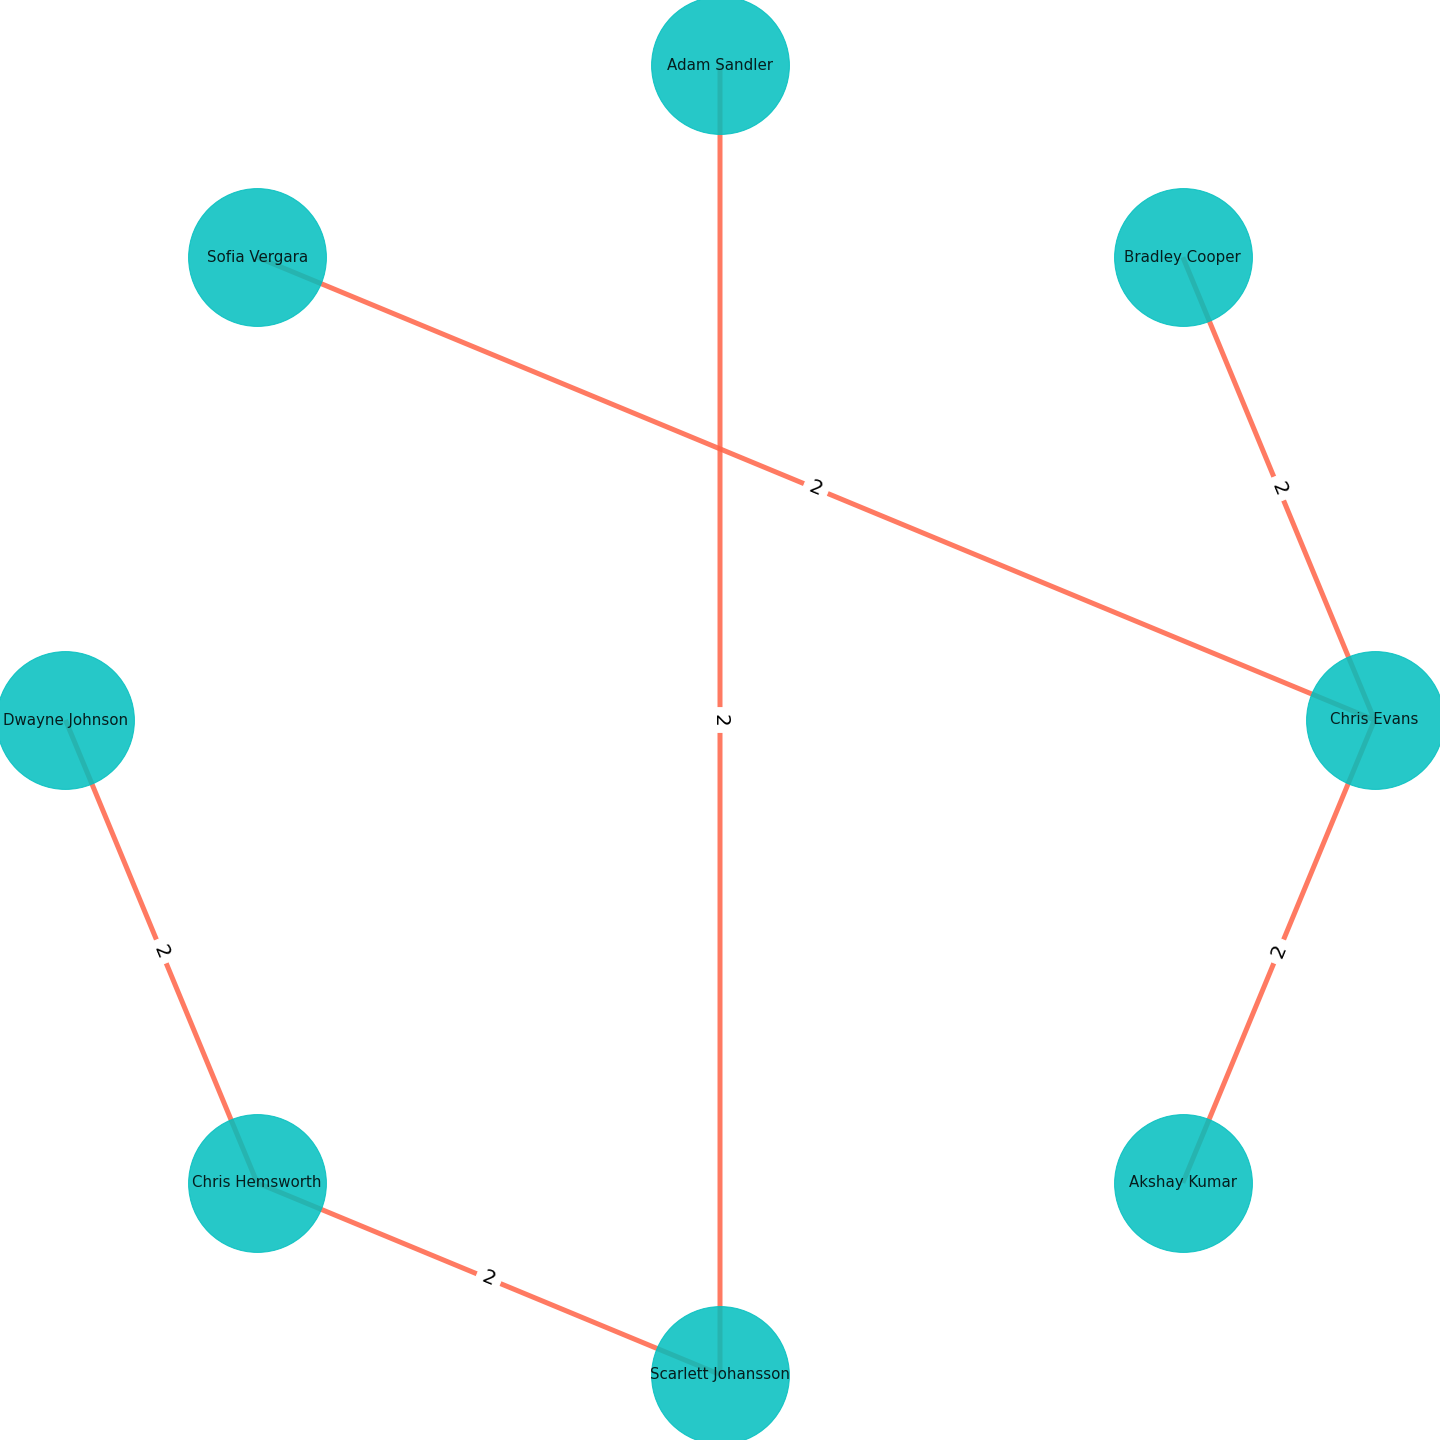

In [13]:
display.Image("./twos_graph.png", width=500)

#### Plot of the graph with edges with weight = 3:

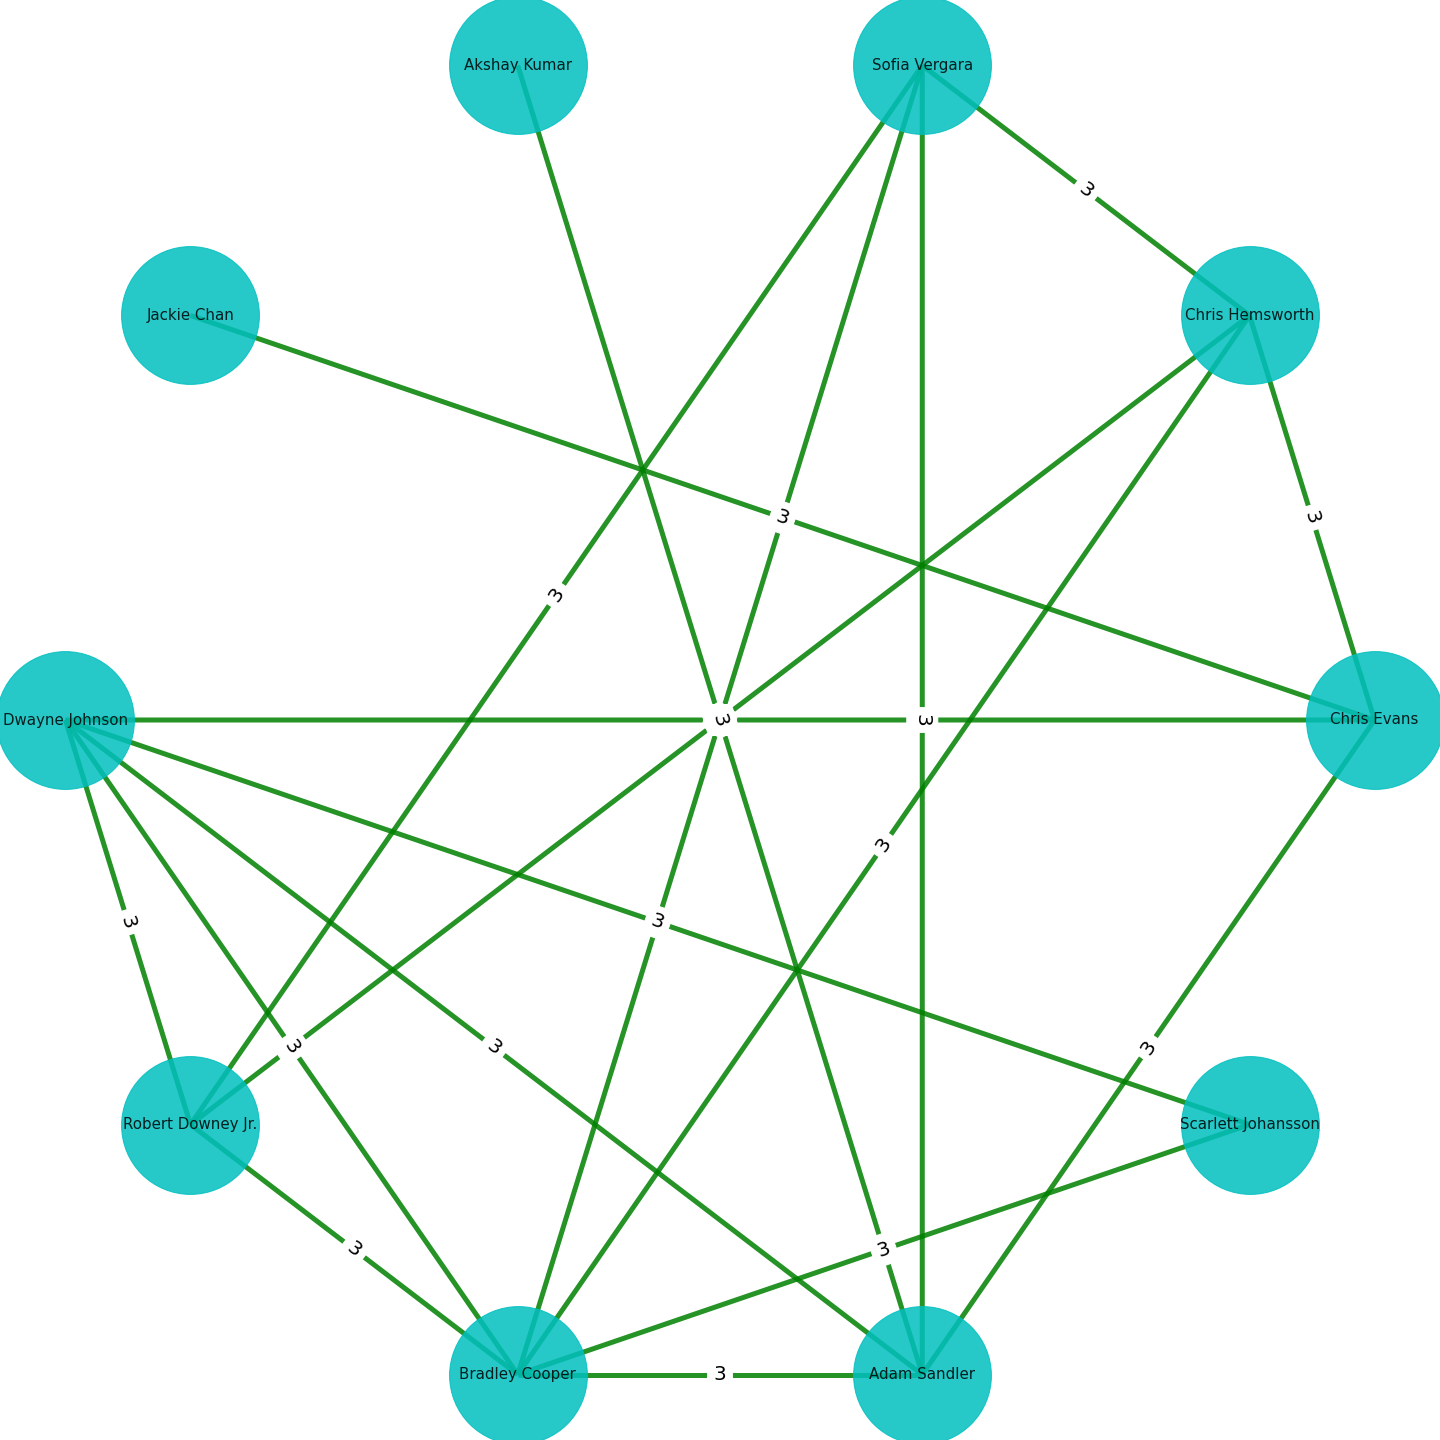

In [14]:
display.Image("./threes_graph.png", width=500)

### Now let's build a word cloud based on the received movie descriptions

№1. WordCloud for Dwayne Johnson:


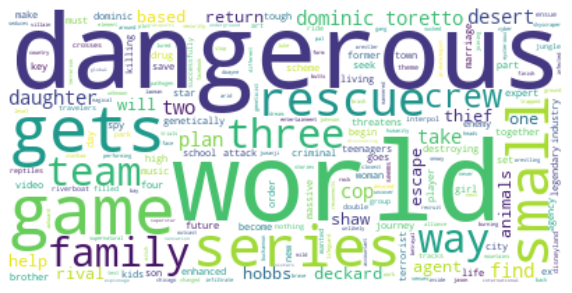

№2. WordCloud for Chris Hemsworth:


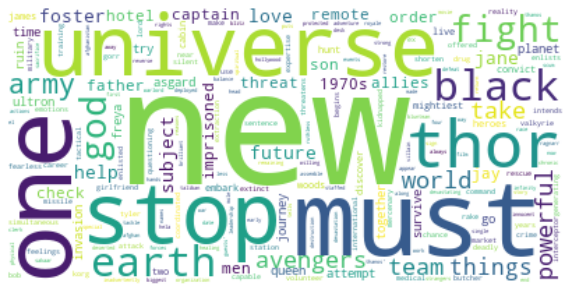

№3. WordCloud for Robert Downey Jr.:


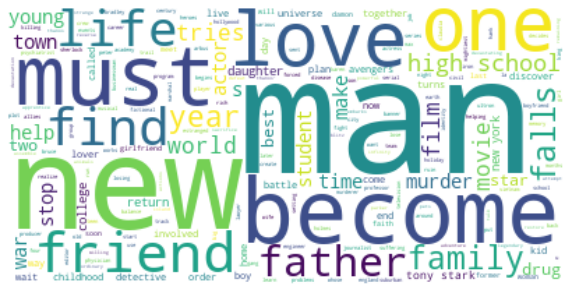

№4. WordCloud for Akshay Kumar:


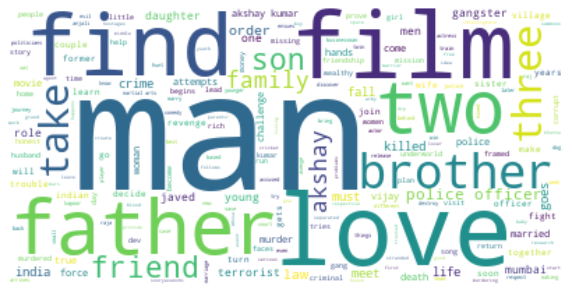

№5. WordCloud for Jackie Chan:


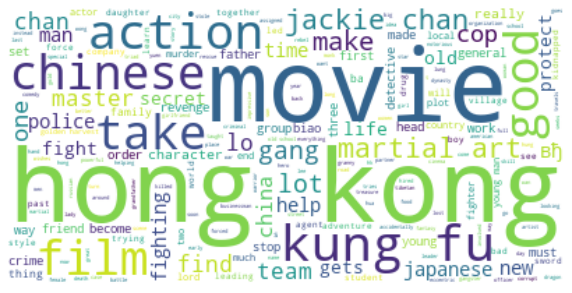

№6. WordCloud for Bradley Cooper:


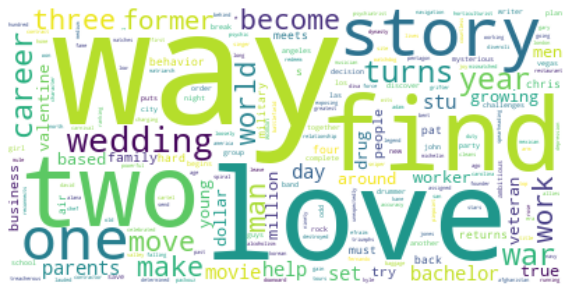

№7. WordCloud for Adam Sandler:


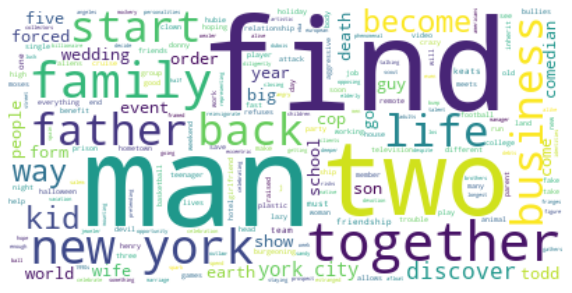

№8. WordCloud for Scarlett Johansson:


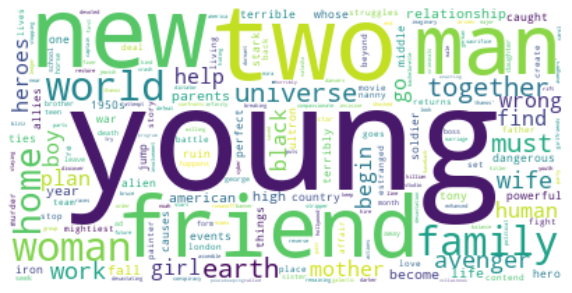

№9. WordCloud for Sofia Vergara:


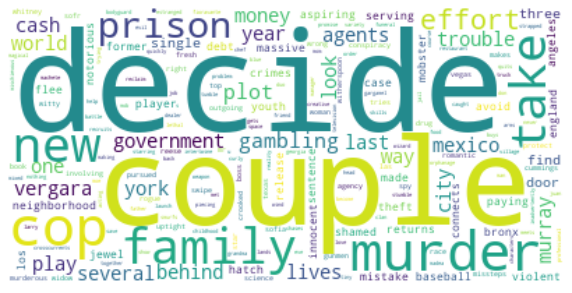

№10. WordCloud for Chris Evans:


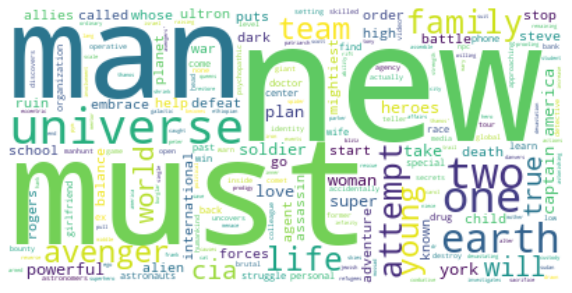

In [16]:
stopwords = set(STOPWORDS)
index = 0

for actor, url in actors:
    
    # Code for reading movie descriptions from files.
    file_name = actor.replace(' ', '_').replace('.', '')
    description = 'description_by_actor_TXT\\' + file_name + '.txt'
        
    with open(description) as f:
        content = f.readlines()
    
    text = " ".join(review for review in content)
    text = text.replace('.', ' ').replace(',', ' ').replace('!', ' ').lower()
    
    wc = WordCloud(min_font_size=2,
                   background_color="white", 
                   stopwords=stopwords,  # Getting rid of stopword
                   contour_width=7)
    
    # Code for printing out a wordcloud. 
    wc.generate(text)
    # 10 wordclouds. One for each actor.
    index += 1
    print(f'№{index}. WordCloud for {actor}:')
    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()